In [38]:
!pip install numdifftools

     -------------------------------------- 100.2/100.2 kB 2.9 MB/s eta 0:00:00


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from typing import Callable, Union

from scipy.optimize import minimize
import numdifftools as ndt

In [3]:
data = np.loadtxt("dec_lengths.txt")
data = np.sort(data)

In [66]:
def pdf(y2: float, params) -> Union[float, np.ndarray]:
  y1, data = params
  y1 = 1/y1
  y2 = 1/y2
  p1 = y1*np.exp(-y1*data)
  p2 = y2*np.exp(-y2*data)
  return 0.84*p1 + 0.16*p2

In [76]:
def mixed_exponential_pdf(y2_inverse: float, params) -> Union[float, np.ndarray]:
    """
    Calculate the probability density function (PDF) for a mixture of two exponential distributions.
    
    Parameters
    ----------
    y2_inverse : float
        The inverse of the second exponential distribution parameter (1 / lambda_2).
    
    params : tuple
        A tuple containing the inverse of the first exponential distribution parameter (1 / lambda_1) and the data points.
    
    Returns
    -------
    Union[float, np.ndarray]
        The PDF values for the given data points based on the mixture of two exponential distributions.
    """
    y1_inverse, data = params
    y1 = 1/y1_inverse
    y2 = 1/y2_inverse
    p1 = y1 * np.exp(-y1 * data)
    p2 = y2 * np.exp(-y2 * data)
    
    return 0.84 * p1 + 0.16 * p2

In [77]:
p = (4188.0, data)
print(-np.sum(np.log(mixed_exponential_pdf(0.1, p))))
print(-np.sum(np.log(mixed_exponential_pdf(0.01, p))))

937254.9089397528
937462.0430694247


In [78]:
def neg_log_likelihood_gauss(y2, params) -> float:
    return -np.sum(np.log(mixed_exponential_pdf(y2, params)))

bnd = (0, None)
p = [4188.0, data]
neg_log_likelihood_gauss(0.1, p)

937254.9089397528

In [26]:
if not isinstance(p, tuple):
        p = (p,)
p

([0.0002387774594078319,
  array([6.56179931e-02, 7.14683653e-02, 7.37256079e-02, ...,
         4.05635135e+04, 4.14334330e+04, 4.31568658e+04])],)

In [79]:
res_neg_log = minimize(neg_log_likelihood_gauss,method='Powell', x0=(0.1),bounds=(bnd,), args=p)
print(1/res_neg_log.x)
print(res_neg_log)
print(p[0])


[0.00177838]
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 916722.0338176396
       x: [ 5.623e+02]
     nit: 2
   direc: [[-3.605e+00]]
    nfev: 42
4188.0


In [75]:
hessian_func = ndt.Hessian(neg_log_likelihood_gauss)
hessian_matrix = hessian_func(res_neg_log.x, p)
print(p[0])
print(hessian_matrix)
inv_hessian = np.linalg.inv(hessian_matrix)
uncertainties = np.sqrt(np.diag(inv_hessian))

print("Parameter uncertainties:", uncertainties)
print(uncertainties/res_neg_log.x*100)

4188.0
[[0.01011085]]
Parameter uncertainties: [9.94503212]
[1.76860169]


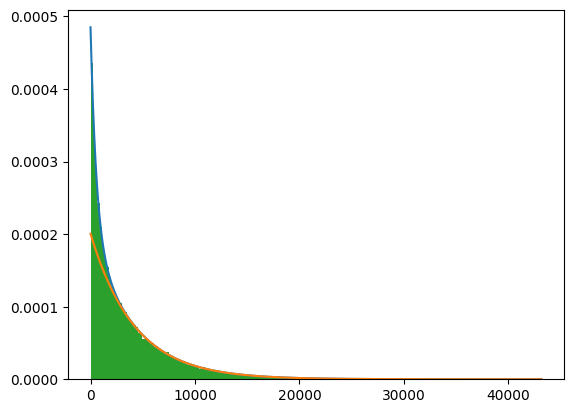

In [35]:
plt.plot(data,pdf(res_neg_log.x, p[0]))
plt.plot(data,pdf(mu_kaons, p[0]))
plt.hist(data,bins=200, density=True)
plt.show()


## Calculating the $\mu_{kaons}$ from $\mu_{total}$ and $\mu_{pions}$
We have the following means
\begin{equation}
\mu_{kaons}\frac{1}{n_{kaons}}\sum_i x_i \qquad \mu_{pions}\frac{1}{n_{pions}}\sum_i x_i, \qquad \mu_{total}=\frac{1}{n_{pions}+n_{kaons}}\sum_i x_i
\end{equation}


Given that we already know $\mu_{pion}$, $\mu_{total}$ and the ration f $n_{pions}$ and $n_{kaons}$ we get 
 

\begin{equation}
\mu_{kaons} = \frac{(n_{kaons}+n_{pions})\mu_{total}-n_{pions}\cdot\mu_{total}}{n_{kaons}}
\end{equation}


In [23]:
mu = np.mean(data)
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
n_pions = 0.84*len(data)
n_kaons = 0.16*len(data)
mu_kaons = ((n_kaons+n_pions)*mu - n_pions*mu_pions)/n_kaons
mu_kaons/byc

3.3353352317517785e-09

# 


In [83]:
print(mu_kaons)
print(mu_pions)

536.564512371853
4188


In [34]:
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
mu_kaons = 1/res_neg_log.x
kaon_tau = mu_kaons/byc
print(pion_tau)
print(kaon_tau)



2.6033e-08
[3.49500609e-09]


In [118]:
s1 = 562.2512011
s2 = 4188
t1 = 1.2380*1e-8
t2 = 2.6033*1e-8
c = 299792458
v1 = s1/t1*1/(np.sqrt(1+s1**2/(t1**2*c**2)))
v2 = s2/t2*1/(np.sqrt(1+s2**2/(t2**2*c**2)))
print(v1/v2)

0.9999799503363256
